## The python geospatial data stack

### Shapely
* Manipulation and analysis of geometric objects in the Cartesian plane.

### Fiona
* Read/write geospatial data files.

### Geopandas
* A pandas extension for geospatial data.
* Geopandas depends on the other libraries. 



## First things, first
Let's start installing the stack. Installing Geopandas should also install the other libraries.



In [ ]:
!pip install geopandas 

# Geometric Objects
Geometric objects are assumed to exissit in a cartesian space.

Each geometric type will have a set of general attributes, methods and operations associated to it such as:
### Properties
* length
* area

### Transformations
* Buffer
* Centroid
* Bounds
___________________
## Points
We can use the class `Point` to create a dimensionless `(x,y)` or  `(x,y,z)` point in a cartesian space.

In [3]:
from shapely.geometry import Point

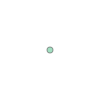

In [45]:
p1 = Point(0,0)
p1

A `Point` object is dimensionless.

In [9]:
p1.length

0.0

In [10]:
p1.area

0.0

_____________________
## Lines
Lines are 1D objects. We can use the class `LineString(p1,p2,...)`  to define a line segment or a concatenation of line segments connecting points `p1`, `p2`...

In [46]:
from shapely.geometry import LineString

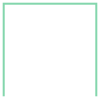

In [48]:
l1 = LineString([(0,0), (0,1),(1,1),(1,0)])
l1

A line string has a length.

In [49]:
l1.length

3.0

but not an area (since it is 1D)

In [50]:
l1.area

0.0

___________
## Polygons
A Polygon is a 2D object defined by the a sequence of  points corresponding to the vertices of the shape. 

In [51]:
from shapely.geometry import Polygon

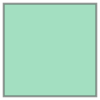

In [57]:
## A square of side 1
pol1 = Polygon([(0,0), (0,1),(1,1),(1,0)])
pol1

As 2D objects, polygons have both length and area

In [55]:
pol1.length

4.0

In [56]:
pol1.area

1.0

# Collections
These geometries can also be represented as collections of geometries.
For instance:
* `MultiPolygon`
* `MultiLineString` 
* `MultiPoint`


In [59]:
from shapely.geometry import MultiPolygon, MultiLineString, MultiPoint

### MultiPoint

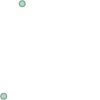

In [68]:
p2 = Point((1,5))
mpoint = MultiPoint([p1,p2])
mpoint

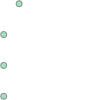

In [70]:
## You can also define it passing the coordinates to the constructor.
mpoint2 = MultiPoint([(0,0), (0,1), (0,2), (0.5, 3)])
mpoint2

### MultiLineString

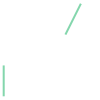

In [73]:
##                             line 1        line 2
mline = MultiLineString([ [(0,0), (0,1)], [(2,2),(2.5,3)]  ] )
mline

### MultiPolygon

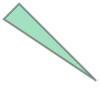

In [74]:
pol2 = Polygon([(0,4), (1,5), (6,0)])
pol2

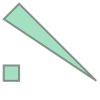

In [75]:

mpol = MultiPolygon([pol1, pol2])
mpol

__________________________
# Transformations

### Centroid
Returns a `Point` corresponding to the center  (i.e., mean coordinate   $(\hat{x}, \hat{y})$) of the object.



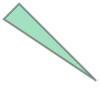

In [142]:
pol2

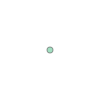

In [136]:
pol2.centroid

In [141]:
list(pol2.centroid.coords)

[(2.333333333333333, 3.0)]

### Buffer
Returns an approximate representation of all points within a given distance of the this geometric object

For a point `p`, `p.buffer(r)` creates a circle of radius `r` 

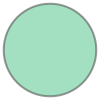

In [41]:
c1 = p1.buffer(2)
c1

This circle now has an area

In [39]:
print(c1.area)

12.546193962183755


In [40]:
print(c1.length)

12.561324627819017


The `buffer` transformation can be applied to any geometry type

#### LineString buffer

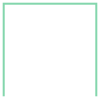

In [83]:
l1

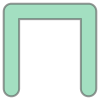

In [82]:
l1.buffer(0.1)

#### Polygon buffer

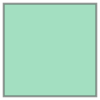

In [87]:
pol1

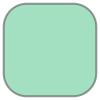

In [88]:
pol1.buffer(0.5)

### Boundary

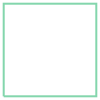

In [90]:
pol1.boundary

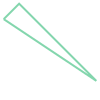

In [91]:
pol2.boundary

#### Question:
What is the geometry type of the boundary of a polygon?

## Binary operations
### Distance
Returns the minimum distance between two objects


In [150]:
print(list(p1.coords))
print(list(p2.coords))

[(0.0, 0.0)]
[(1.0, 5.0)]


In [151]:
p1.distance(p2)

5.0990195135927845

Distance can be computed between any geometry types

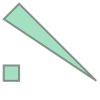

In [187]:
MultiPolygon([pol1,pol2])

In [188]:
pol1.distance(pol2)

1.9414506867883017

### Intersection

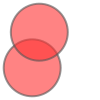

In [177]:
c1 = p1.buffer(4)
c2 = p2.buffer(4)
MultiPolygon([c1,c2])

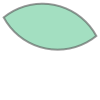

In [178]:
c1.intersection(c2)

### Difference

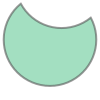

In [179]:
c1.difference(c2)

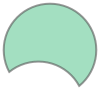

In [180]:
c2.difference(c1)

### Symmetric difference

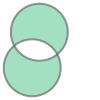

In [181]:
c1.symmetric_difference(c2)

# Relationships

#### Equals
Returns `True` if the set-theoretic boundary, interior, and exterior of the object coincide with those of the other.

In [189]:
p1.equals(p1)

True

In [190]:
Point(0,0).equals(Point(0,0))

True

In [191]:
p1.equals(p2)

False

#### Contains
Returns `True` if no points of other lie in the exterior of the object and at least one point of the interior of other lies in the interior of object.

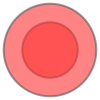

In [192]:
c3 = p1.buffer(3)
c4 = p1.buffer(5)
MultiPolygon([c3,c4])

In [193]:
c3.contains(c4)

False

In [194]:
c4.contains(c3)

True

#### Overlaps
Returns `True` if the geometries have more than one **but not all points in common**, have the same dimension, **and the intersection of the interiors of the geometries has the same dimension as the geometries themselves.**

In [195]:
c3.overlaps(c4)

False

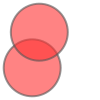

In [197]:
MultiPolygon([c1,c2])

In [198]:
c1.overlaps(c2)

True

#### Intersects
Returns `True` if the boundary or interior of the object **intersect in any way** with those of the other.

In [199]:
c3.intersects(c4)

True

In [200]:
c4.intersects(c3)

True

In [201]:
c1.intersects(c2)

True

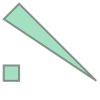

In [202]:
MultiPolygon([pol1,pol2])

In [203]:
pol1.intersects(pol2)

False

#### Crosses
Returns `True` if the **interior of the object intersects** the interior of the other **but does not contain it**, and **the dimension of the intersection is less than the dimension of the one or the other**.

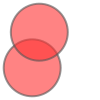

In [204]:
MultiPolygon([c1,c2])

* (OK) They interiors intersect
* (OK) One does not contain the other 
* (X)  The dimension of the intersection (2D) is less than the dimension of the objects

In [206]:
c1.crosses(c2)

False

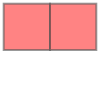

In [207]:
c5 = Polygon([(0,0), (0,1),(1,1),(1,0)])
c6 = Polygon([(1,0), (1,1),(2,1),(2,0)])
MultiPolygon([c5,c6])

* (X) They interiors intersect
* (OK) One does not contain the other 
* (OK)  The dimension of the intersection (2D) is less than the dimension of the objects

In [214]:
c5.crosses(c6)

False

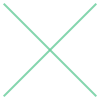

In [223]:
l3 = LineString([(0,0),(2,2)])
l4 = LineString([(2,0),(0,2)])
MultiLineString([l3,l4])

In [224]:
l3.crosses(l4)

True

### Touches
Returns True if the objects have **at least one point in common** and **their interiors do not intersect** with any part of the other.



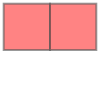

In [225]:
MultiPolygon([c5,c6])

In [226]:
c5.touches(c6)

True